# Quantifying grain size populations

> **Aim**: TODO

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# run the script (change the path to GrainSizeTools_script.py accordingly!)
%run C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/GrainSizeTools_script.py

module plot imported
module averages imported
module stereology imported
module piezometers imported
module template imported

Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: 2023.11.xx
Documentation: https://marcoalopez.github.io/GrainSizeTools/

Type get.functions_list() to get a list of the main methods



## 1. Importing datasets

TODO

In [2]:
# Load the example dataset
url = 'https://raw.githubusercontent.com/marcoalopez/GrainSizeTools/master/grain_size_tools/DATA/data_set.txt'
dataset = pd.read_csv(url, sep='\t')

dataset

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970
...,...,...,...,...,...,...,...,...,...,...,...
2656,2657,452.50,0.789,28.504,1368.0,1565.5,127.875,22.500,1.235,0.810,0.960
2657,2658,1081.25,0.756,47.909,1349.5,1569.5,108.246,31.363,1.446,0.692,0.960
2658,2659,513.50,0.720,32.962,1373.0,1586.0,112.286,20.496,1.493,0.670,0.953
2659,2660,277.75,0.627,29.436,1316.0,1601.5,159.102,17.002,1.727,0.579,0.920


In [3]:
# estimate equivalent circular diameters (ECDs)
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)
dataset.head()

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,diameters
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937,14.149803
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972,51.210889
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972,49.974587
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947,83.137121
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970,21.821815


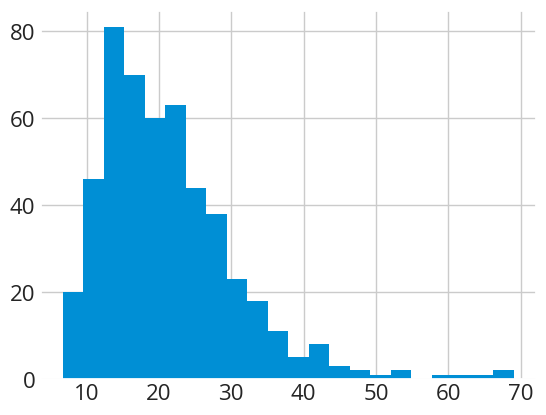

In [4]:
toy_dataset = averages.gen_lognorm_population(scale=np.log(20),   # set sample geometric mean to 20
                                              shape=np.log(1.5),  # set the lognormal shape to 1.5
                                              n=500,              # sample size = 500
                                              seed=2)

_ = plt.hist(toy_dataset, bins='fd')

## 2. Statistical description of grain size populations

TODO

In [5]:
summarize(toy_dataset)

 
CENTRAL TENDENCY ESTIMATORS
Arithmetic mean = 21.33 microns
Confidence intervals at 95.0 %
mCox method: 20.51 - 22.11 (-3.8%, +3.7%), length = 1.601
Geometric mean = 19.57 microns
Confidence interval at 95.0 %
CLT method: 18.88 - 20.29 (-3.5%, +3.7%), length = 1.413
Median = 19.42 microns
Confidence interval at 95.0 %
robust method: 18.47 - 20.78 (-4.9%, +7.0%), length = 2.312
Mode (KDE-based) = 15.95 microns
Maximum precision set to 0.1
KDE bandwidth = 2.88 (silverman rule)
 
DISTRIBUTION FEATURES
Sample size (n) = 500
Standard deviation = 9.42 (1-sigma)
Interquartile range (IQR) = 11.42
Lognormal shape (Multiplicative Standard Deviation) = 1.51
Shapiro-Wilk test warnings:
Data is not normally distributed!
Normality test: 0.89, 0.00 (test statistic, p-value)


By default, the ```summarize()``` function returns:

- Different **central tendency estimators** ("averages") including the arithmetic and geometric means, the median, and the KDE-based mode (i.e. frequency peak).
- The **confidence intervals** for the different means and the median at 95% of certainty in absolute value and percentage relative to the average (*a.k.a* coefficient of variation). The meaning of these intervals is that, given the observed data, there is a 95% probability (one in 20) that the true value of grain size falls within this credible interval. The function provides the lower and upper bounds of the confidence interval, the error in percentage respect to the average, and the interval length. 
- The methods used to estimate the confidence intervals for each average (excepting for the mode). The function ```summarize()``` automatically choose the optimal method depending on distribution features (see below)
- The sample size and two population dispersion measures: the (Bessel corrected) [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) and the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).
- The shape of the lognormal distribution using the multiplicative standard deviation (MSD)
- A Shapiro-Wilk test warning indicating when the data deviates from normal and/or lognormal (when p-value < 0.05).

In the example above, the Shapiro-Wilk test tells us that the distribution is not normally distributed, which is to be expected since we know that this is a lognormal distribution. Note that the geometric mean and the lognormal shape are very close to the values used to generate the synthetic random dataset, 20 and 1.5 respectively. Now, let's do the same using the dataset that comes from a real rock, for this, we have to pass the column with the diameters:

In [6]:
summarize(dataset['diameters'])

 
CENTRAL TENDENCY ESTIMATORS
Arithmetic mean = 34.79 microns
Confidence intervals at 95.0 %
CLT (ASTM) method: 34.09 - 35.48, (±2.0%), length = 1.393
Geometric mean = 30.10 microns
Confidence interval at 95.0 %
CLT method: 29.47 - 30.75 (-2.1%, +2.2%), length = 1.283
Median = 31.53 microns
Confidence interval at 95.0 %
robust method: 30.84 - 32.81 (-2.2%, +4.1%), length = 1.970
Mode (KDE-based) = 24.31 microns
Maximum precision set to 0.1
KDE bandwidth = 4.01 (silverman rule)
 
DISTRIBUTION FEATURES
Sample size (n) = 2661
Standard deviation = 18.32 (1-sigma)
Interquartile range (IQR) = 23.98
Lognormal shape (Multiplicative Standard Deviation) = 1.75
Shapiro-Wilk test warnings:
Data is not normally distributed!
Normality test: 0.95, 0.00 (test statistic, p-value)
Data is not lognormally distributed!
Lognormality test: 0.99, 0.02 (test statistic, p-value)


Leaving aside the different numbers, there are some subtle differences compared to the results obtained with the toy dataset. First, the confidence interval method for the arithmetic mean is no longer the modified Cox (mCox) but the one based on the central limit theorem (CLT) advised by the [ASTM](https://en.wikipedia.org/wiki/ASTM_International). As previously noted, the function ```summarize()``` automatically choose the optimal confidence interval method depending on distribution features. We show below the decision tree flowchart for choosing the optimal confidence interval estimation method, which is based on [Lopez-Sanchez (2020)](https://doi.org/10.1016/j.jsg.2020.104042).

![](https://github.com/marcoalopez/GrainSizeTools/blob/master/FIGURES/avg_map.png?raw=true)

The reason why the CLT method applies in this case is that the grain size distribution is not sufficiently close to a logarithmic distribution (note the Shapiro-Wilk test warning with a p-value < 0.05), and this might cause an inaccurate estimate of the arithmetic mean confidence interval.

Now, let's focus on the different options of the ``summarize()`` method.

## 3. Representation of grain size populations

The plot module includes a series of plots to visualize and characterize grain size populations. Before we get into the details, let's run the GrainSizeTools script and load the example dataset.

Number of classes =  45
binsize =  3.41
KDE bandwidth =  4.01


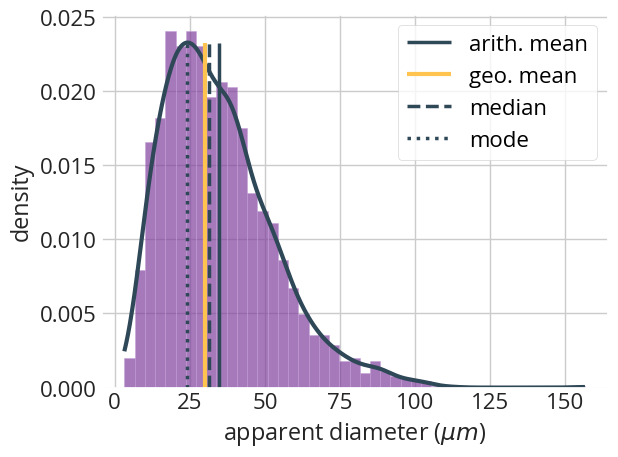

In [7]:
fig, ax = plot.distribution(dataset['diameters'])

By default, the ```plot.distribution()``` function returns a plot containing the histogram and the kernel density values of the distribution and the location of the averages estimated by the function ``summarize`` by default.

> 👉 Note that when calling ``plot.distribution()`` we store two variables ``fig`` and ``ax``. The variable ``fig`` stems for figure and ``ax`` for the axe to the current figure*. This is not compulsory. Indeed, you can directly write ``plot.distribution(dataset['diameters'])`` to get same result. However, if you want to save or tweak the plot later you will need the ``fig`` and ``ax`` variables (or any name you prefer). The variable ``fig``, for example, allows you to save the plot (see an example below).
>
> *If you can't tell the difference between a figure and an axe check the elements of a figure here: https://matplotlib.org/3.2.1/gallery/showcase/anatomy.html

In [8]:
# If you want to save the plot in your hard disk
fig.savefig("test_distribution.png", dpi=150)

Note that the format of image (e.g. 'png', 'pdf', 'tif', 'svg') will depend on the extension of the file (after the dot) you define.
Some interesting parameters when saving a figure are:
- ``dpi`` : the resolution in dots per inch
- ``facecolor`` : the facecolor of the figure, e.g. 'white', 'black', etc.
- ``quality`` : the image quality from 1 (worst) to 95 (best). Only applicable if format is *jpg*.

In [9]:
plot.distribution?

Signature:
plot.distribution(
    data,
    plot=('hist', 'kde'),
    avg=('amean', 'gmean', 'median', 'mode'),
    binsize='auto',
    bandwidth='silverman',
    **fig_kw,
)
Docstring:
Return a plot with the ditribution of (apparent or actual) grain sizes
in a dataset.

Parameters
----------
data : array_like
    the size of the grains

plot : string, tuple or list; optional
    the type of plot, either histogram ('hist'), kernel density estimate
    ('kde') or both ('hist', 'kde'). Default is both.

avg : string, tuple or list; optional
    the central tendency measures o show, either the arithmetic ('amean')
    or geometric ('gmean') means, the median ('median'), and/or the
    KDE-based mode ('mode'). Default all averages.

binsize : string or positive scalar; optional
    If 'auto', it defines the plug-in method to calculate the bin size.
    When integer or float, it directly specifies the bin size.
    Default: the 'auto' method.

    | Available plug-in methods:
    | 'auto' (

### 3.1 Testing lognormality

Sometimes can be helpful to test whether the data follows or deviates from a lognormal distribution. For example, to find out if the dataset is suitable for applying the two-step stereological method or which confidence interval method is best. The script uses two methods to test whether the distribution of grain size follows a lognormal distribution. One is a visual method named [quantile-quantile (q-q) plots]([https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot](https://en.wikipedia.org/wiki/Q–Q_plot)) and the other is a quantitative test named the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro–Wilk_test). For this we use the GrainSizeTools function ```test_lognorm``` as follows :

Shapiro-Wilk test (lognormal):
0.99, 0.01 (test statistic, p-value)
It doesnt look like a lognormal distribution (p-value < 0.05)
(╯°□°）╯︵ ┻━┻


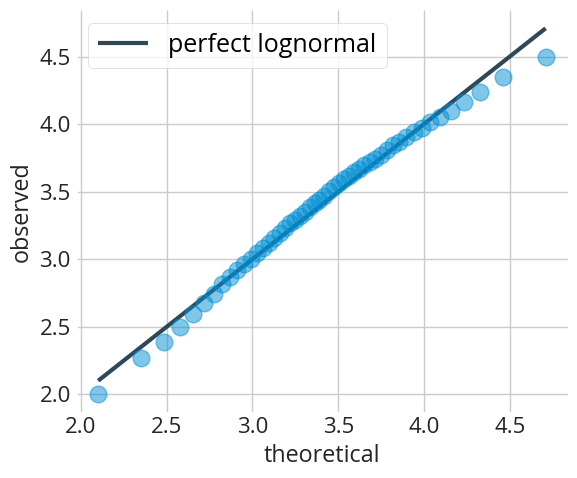

In [10]:
fig2, ax = plot.qq_plot(dataset['diameters'], figsize=(6, 5))

The Shapiro-Wilk test returns two different values, the test statistic and the p-value. This test considers the distribution to be lognormally distributed when the p-value is greater than 0.05. The q-q plot is a visual test that when the points fall right onto the reference line it means that the grain size values are lognormally distributed. The q-q plot has the advantage over the Shapiro-Wilk test that it shows where the distribution deviates from lognormality. 

> 👉 To know more about the q-q plot see https://serialmentor.com/dataviz/

### 3.2 The area-weighted distribution

The plot module also allows plotting the area-weighted distribution of grain sizes using the function ``area_weighted()``. This function also returns some basic statistics such as the area-weighted mean and the histogram features. For example:

DESCRIPTIVE STATISTICS
Area-weighted mean grain size = 53.88 microns
HISTOGRAM FEATURES
The modal interval is 40.85 - 44.26 microns
The number of classes are 46
The bin size is 3.40 according to the auto rule


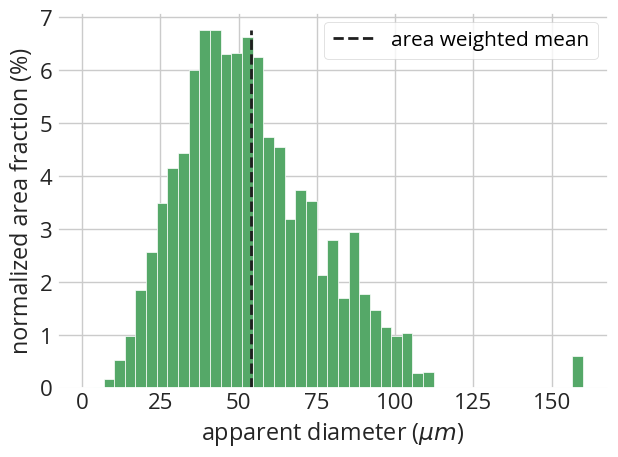

In [11]:
fig3, ax = plot.area_weighted(dataset['diameters'], dataset['Area'])

>  👉 ***When to use and not to use the area-weighted approach?***
>
> You **should not use** the area-weighted mean for the calibration of paleopiezometers or for the comparison of grain size populations, as this is a poorly optimised central tendency measure ([Lopez-Sanchez, 2020](https://doi.org/10.1016/j.jsg.2020.104042)). On the other hand, the area-weighted distribution is useful to visualize the coarser size range, since in number-weighted distributions these sizes are diluted but can represent a significant area or volume.

### 3.3 Normalized grain size distributions

Normalized grain size distributions are representations of the entire grain population standardized using an average of the population, usually the arithmetic mean or the median. The advantage of normalized distribution is that it allows the comparison of grain size distribution with different average grain sizes. For example, to check whether two or more grain size distributions have similar shapes we can compare their standard deviations (SD) or their interquartile ranges (IQR). In this case, the method ``plot.normalized()`` display the distribution on a logarithmic scale and provides the SD or IQR of the normalized population depending on the chosen normalizing factor.

Normalized SD = 0.165
KDE bandwidth =  0.04


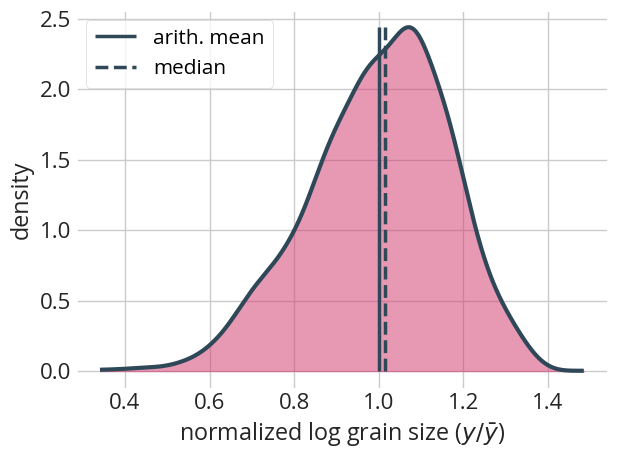

In [12]:
fig4, ax = plot.normalized(dataset['diameters'], avg='amean')

Let's play by changing some of the function parameters. In this case, we are going to establish the median as an alternative normalization factor, and we are also going to smooth the kernel density estimator by increasing the value from 0.04 (estimated according to the Silverman rule) to 0.1. Also, we will set the appearance of the figure using the figsize parameter, where the values within the parentheses are the (width, height) in inches.

Normalized IQR = 0.221
KDE bandwidth =  0.1


(<Figure size 600x500 with 1 Axes>,
 <Axes: xlabel='normalized log grain size ($y / med_{y}$)', ylabel='density'>)

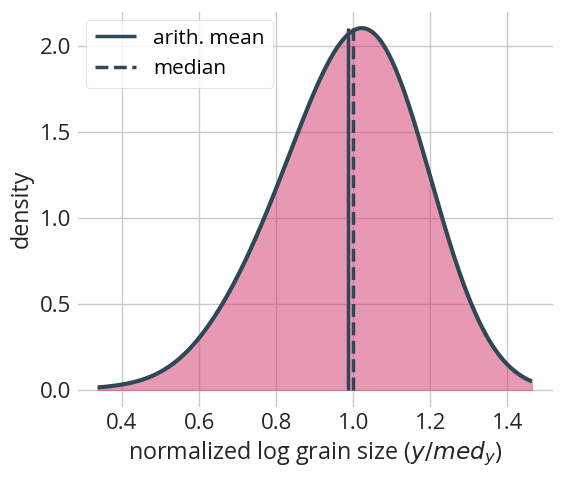

In [13]:
plot.normalized(dataset['diameters'], avg='median', bandwidth=0.1, figsize=(6, 5))

Note that in this case, the method returns the normalized inter-quartile range (IQR) rather than the normalized standard deviation. Also, note that the kernel density estimate appears smoother resembling an almost perfect normal distribution.

TODO

In [14]:
import sys
from datetime import date    
today = date.today().isoformat()
import matplotlib as mpl

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)

Notebook tested in 2023-11-13 using:
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
Numpy 1.26.0
Matplotlib 3.8.0
